In [1]:

!pip install pandas pycaret

from pycaret.regression import *
import pandas as pd

data = pd.read_csv("/content/Fuel_cell_performance_data-Full.csv")

target_column = 'Target2'

data = data.drop(columns=['Target1', 'Target3', 'Target4', 'Target5'])

print("Dataset Columns:", data.columns)
print("\nFirst few rows of the dataset:")
print(data.head()) 

reg_setup = setup(
    data=data,
    target=target_column,
    session_id=42,  
    train_size=0.7,  
    normalize=True,  
    transformation=True, 
)


best_model = compare_models()


print("\nBest Model:")
print(best_model)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 67.3 MB/s eta 0:00:00
   ━━━━

Dataset Columns: Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F12', 'F13', 'F14', 'F15', 'Target2'],
      dtype='object')

First few rows of the dataset:
     F1    F2    F3     F4      F5    F6     F7     F8   F9   F10      F11  \
0  52.9  1.33  49.1  37.13  129.43  35.0  0.281  112.7  207  0.55   98.971   
1  87.6  2.12  48.8  42.10  171.07  37.6  0.153  157.4  188  0.86  101.179   
2  73.3  2.72  93.8  20.11  163.69  44.3  0.367  348.7  270  1.87   98.919   
3  65.6  2.58  48.1  35.11   63.37  32.5  0.279  321.2  322  1.75  101.560   
4  39.6  2.58  49.3  32.93   63.40  47.0  0.149  205.6  203  1.55   98.148   

    F12   F13   F14   F15  Target2  
0  2.87  1362  15.9   429    1.531  
1  2.34  5130  26.1  1819    1.690  
2  2.13  7811  16.7  1763    1.865  
3  2.91  1641  32.1   203    1.920  
4  1.93  7648  27.5   276    1.711  


,Description,Value
0,Session id,42
1,Target,Target2
2,Target type,Regression
3,Original data shape,"(1000, 16)"
4,Transformed data shape,"(1000, 16)"
5,Transformed train set shape,"(700, 16)"
6,Transformed test set shape,"(300, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.2558,0.0971,0.3112,0.6632,0.1392,0.2494,0.1060
lr,Linear Regression,0.2558,0.0971,0.3112,0.6630,0.1392,0.2490,0.5290
ridge,Ridge Regression,0.2558,0.0971,0.3112,0.6630,0.1392,0.2490,0.0750
lar,Least Angle Regression,0.2558,0.0971,0.3112,0.6630,0.1392,0.2490,0.1210
huber,Huber Regressor,0.2560,0.0981,0.3128,0.6593,0.1398,0.2486,0.0840
et,Extra Trees Regressor,0.2641,0.1040,0.3223,0.6391,0.1445,0.2606,0.4000
rf,Random Forest Regressor,0.2666,0.1070,0.3266,0.6270,0.1465,0.2636,0.9760
gbr,Gradient Boosting Regressor,0.2671,0.1079,0.3278,0.6250,0.1480,0.2662,0.3900
ada,AdaBoost Regressor,0.2913,0.1169,0.3413,0.5980,0.1542,0.2966,0.2320
lightgbm,Light Gradient Boosting Machine,0.2818,0.1202,0.3462,0.5828,0.1561,0.2793,2.0950


Processing:   0%|          | 0/81 [00:00<?, ?it/s]


Best Model:
BayesianRidge()


In [2]:
final_model = finalize_model(best_model)

save_model(final_model, 'best_fuel_cell_model')

evaluate_model(final_model)

predictions = predict_model(final_model)

predictions.head()
unseen_data = data.sample(5)
new_predictions = predict_model(final_model, data=unseen_data)

print(new_predictions)

Transformation Pipeline and Model Successfully Saved


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.2618,0.1000,0.3163,0.6566,0.1408,0.2516


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.2353,0.0746,0.2731,0.5974,0.1034,0.1386


            F1    F2         F3         F4          F5         F6     F7  \
521  53.299999  2.96  39.799999  29.850000  132.610001  39.200001  0.168   
737  79.400002  1.34  67.699997  38.540001   95.220001  31.799999  0.100   
740  57.400002  2.64  57.200001  47.099998  153.100006  46.599998  0.156   
660  52.299999  2.27  64.099998  29.330000  123.169998  30.000000  0.266   
411  87.199997  1.24  40.599998  15.390000   40.860001  32.099998  0.202   

             F8   F9   F10         F11   F12   F13        F14   F15  Target2  \
521  250.199997  148  0.99   98.070000  2.33  5382  23.500000  1706    1.732   
737  163.300003  198  0.99  102.834999  2.15  7648  26.299999  1675    2.023   
740  268.100006  294  1.73  101.441002  1.90   852  25.799999  1203    2.044   
660  108.099998  385  1.54  100.304001  2.82  8513  18.400000  1641    1.679   
411  232.600006  302  1.54   99.363998  2.82  5708  23.100000   428    0.859   

     prediction_label  
521          1.498943  
737          1

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.2618,0.1000,0.3163,0.6566,0.1408,0.2516


Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F12', 'F13', 'F14', 'F15', 'Target2', 'prediction_label'],
      dtype='object')


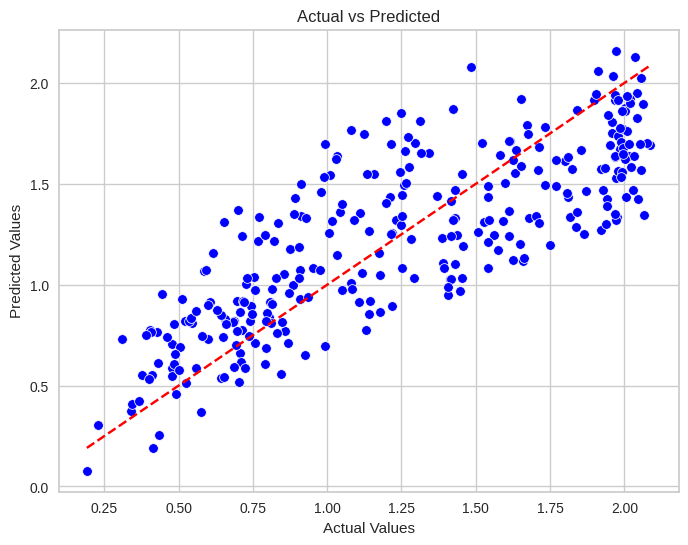

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


predictions = predict_model(final_model)

print(predictions.columns)

results = pd.DataFrame({
    'Actual': predictions[target_column],  
    'Predicted': predictions['prediction_label']  
})

# Plot the Actual vs Predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results, color='blue')
plt.plot([results['Actual'].min(), results['Actual'].max()],
         [results['Actual'].min(), results['Actual'].max()],
         color='red', linestyle='--') 
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()